In [0]:
import pandas as pd

# Descargar y cargar el archivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280/OD315", "Proline"
]
df = pd.read_csv(url, header=None, names=column_names)

# Mostrar las primeras filas
df.head()


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
!pip install mlflow
print(df.info())
print(df.isnull().sum())
print(df.describe())


You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-9d422bc1-c172-4d49-bf77-8ac3322a61fa/bin/python -m pip install --upgrade pip' command.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/O

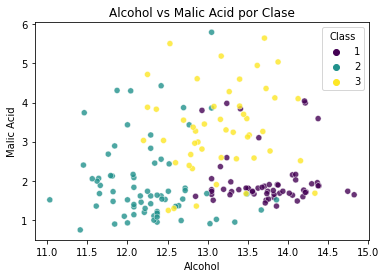

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión de dos variables: 'Alcohol' vs 'Malic_acid', con diferentes colores por 'Class'
sns.scatterplot(data=df, x="Alcohol", y="Malic_acid", hue="Class", palette="viridis", alpha=0.8)
plt.title("Alcohol vs Malic Acid por Clase")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend(title="Class")
plt.show()



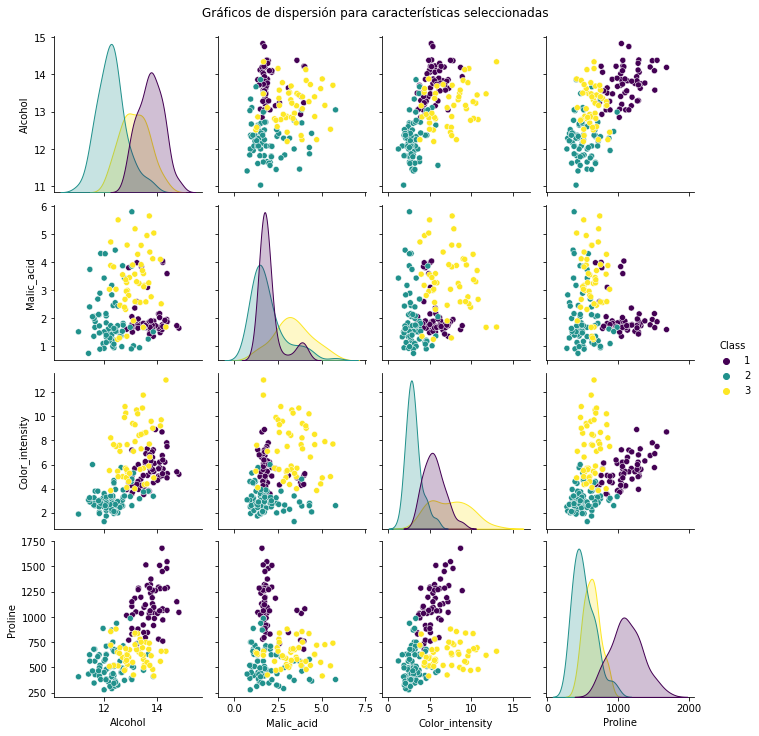

In [0]:
sns.pairplot(df, vars=["Alcohol", "Malic_acid", "Color_intensity", "Proline"], hue="Class", palette="viridis")
plt.suptitle("Gráficos de dispersión para características seleccionadas", y=1.02)
plt.show()


2024/11/25 22:32:47 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /local_disk0/repl_tmp_data/ReplId-3e50a-1daf9-12e23-7/tmp0iphhp5c/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2024/11/25 22:32:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9814814814814815
Precision: 0.982716049382716
Recall: 0.9814814814814815
F1 Score: 0.9815749306918357


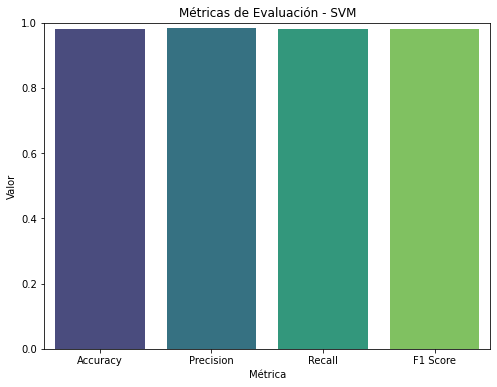

🏃 View run rogue-auk-385 at: https://community.cloud.databricks.com/ml/experiments/2551573669228961/runs/2584c9e481824fdb86e456d584417159
🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/2551573669228961


In [0]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

# Cargar el conjunto de datos (reemplaza con la ruta local si es necesario)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
                'Flavanoids', 'NonFlavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 
                'OD280/OD315OfDilutedWines', 'Proline']
df = pd.read_csv(url, names=column_names)

# Separar las características y la variable objetivo
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características (SVM se beneficia del escalado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configurar el experimento en MLflow
mlflow.set_experiment("/Users/ccoq2013@gmail.com/Wine SVM Classification")

# Comenzar un nuevo run de MLflow
with mlflow.start_run():
    # Inicializar y entrenar el modelo SVM
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_scaled, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Registrar las métricas en MLflow
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(model, "svm_model")

    # Imprimir las métricas
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Graficar las métricas de evaluación
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [acc, precision, recall, f1]

    plt.figure(figsize=(8,6))
    sns.barplot(x=metrics, y=values, palette="viridis")
    plt.title("Métricas de Evaluación - SVM")
    plt.xlabel("Métrica")
    plt.ylabel("Valor")
    plt.ylim(0, 1)  # Para asegurarnos de que las métricas se ajusten entre 0 y 1
    plt.show()




In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en variables independientes (X) y dependiente (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test_scaled)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [0]:
from sklearn.neighbors import KNeighborsClassifier



# Entrenar modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluar modelo KNN
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.9629629629629629
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

KNN Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


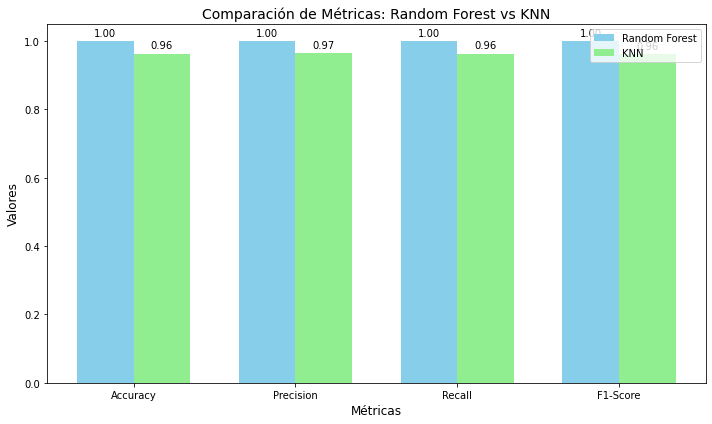

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular métricas para Random Forest
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

# Calcular métricas para KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Datos para el gráfico
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]

x = np.arange(len(metrics))  # Posiciones de las métricas
width = 0.35  # Ancho de las barras

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, knn_scores, width, label='KNN', color='lightgreen')

# Configurar etiquetas y título
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valores', fontsize=12)
ax.set_title('Comparación de Métricas: Random Forest vs KNN', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Añadir los valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [0]:
# Nuevas muestras de vino (simuladas como datos numéricos)
# Nuevas muestras de vino (simuladas como datos numéricos)
new_samples = [
    [13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],  # Muestra 1
    [12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]   # Muestra 2
]

# Escalar las nuevas muestras 
new_samples_scaled = scaler.transform(new_samples)

# Realizar las predicciones
predictions = model.predict(new_samples_scaled)

# Mostrar las predicciones
for i, pred in enumerate(predictions):
    print(f"Muestra {i+1} predicción: Variedad {pred}")

Muestra 1 predicción: Variedad 1
Muestra 2 predicción: Variedad 2


/databricks/python/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
